In [1]:
# from sklearn.decomposition import RandomizedPCA, PCA, TruncatedSVD
# from sklearn.linear_model import LogisticRegression
# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler

import csv
import re
import matplotlib
import seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as ss
from matplotlib import style, colors
from matplotlib.lines import Line2D
import html5lib
# import beautifulsoup4 as bs4
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from matplotlib_venn import venn2, venn3, venn3_circles
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, fclusterdata, leaves_list, cophenet
from scipy.spatial.distance import pdist
#pretty display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15, 9)


%config InlineBackend.figure_format = 'retina'
# figure out number of indels

In [ ]:
# look at correlation between 2 variables
df1 = dfn.copy()
var1 = 'hiv_rna_load_at_diagnosis'
var2 = 'genome_logRPM'

clrcol = 'reanne_Putative_histology_x' #color by column
clrs = sorted(df1[clrcol].unique().tolist(), reverse=True)

grpcol = 'reanne_HIV_status_x' #group on x axis by this column
grps = sorted(df1[grpcol].unique().tolist(), reverse=True)

colors = ["orange","blue","yellow", "black"]



fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
df2 = df1.query('{0}=="{1}"'.format(grpcol, "Positive" ))[[var1, var2, clrcol]].dropna()

for j, ctgr in enumerate(clrs):
    x = df2.query('{0}=="{1}"'.format(clrcol, ctgr))[var1]
    y = df2.query('{0}=="{1}"'.format(clrcol, ctgr))[var2]
    _ = ax.plot(x, y, mfc = colors[j], mec='k', 
                ms=7, marker="o", linestyle="None", 
                label='{0}:{1}'.format(ctgr, ctgr))
    _= ax.set_xlabel(var1, fontsize=14)
    _= ax.set_ylabel(var2, fontsize=14)
ax.legend()

In [378]:
fexpr = '/projects/trans_scratch/validations/workspace/szong/Cervical/epigenetics/epi_expression.txt'
fmut = '/projects/trans_scratch/validations/workspace/szong/Cervical/epigenetics/epi_mutation.txt'
fcnv = '/projects/trans_scratch/validations/workspace/szong/Cervical/epigenetics/epi_cnv.txt'
# fhisto = '/projects/trans_scratch/validations/workspace/szong/Cervical/epigenetics/epi_histo.txt'
dfexpr = pd.read_csv(fexpr, index_col='genes')
dfmut = pd.read_csv(fmut, index_col='genes')
dfcnv = pd.read_csv(fcnv, index_col='genes')
# dfhisto = pd.read_csv(fhisto, index_col='covariates')

In [379]:
dfexpr.head(2)

,HTMCP-03-06-02001,HTMCP-03-06-02002,HTMCP-03-06-02003,HTMCP-03-06-02006,HTMCP-03-06-02007,HTMCP-03-06-02008,HTMCP-03-06-02012,HTMCP-03-06-02013,HTMCP-03-06-02020,HTMCP-03-06-02026,...,HTMCP-03-06-02266,HTMCP-03-06-02267,HTMCP-03-06-02268,HTMCP-03-06-02320,HTMCP-03-06-02322,HTMCP-03-06-02326,HTMCP-03-06-02328,HTMCP-03-06-02330,HTMCP-03-06-02332,HTMCP-03-06-02333
genes,,,,,,,,,,,,,,,,,,,,,
ASH2L,9.6760,10.9476,10.3015,10.1733,10.5562,19.0679,10.1183,10.4676,9.1070,6.1817,...,10.3375,4.6468,5.8595,6.8234,6.2849,9.9784,7.5026,6.1019,8.3687,8.2092
BAZ1A,17.9782,23.2534,23.8713,30.9419,17.0308,19.1198,18.5874,24.0171,23.6907,15.9048,...,12.9158,17.3251,17.9142,16.4876,16.8136,11.1818,15.7106,17.1874,15.5105,18.8224


In [380]:
dfmut.head(2)

,HTMCP-03-06-02097,HTMCP-03-06-02001,HTMCP-03-06-02020,HTMCP-03-06-02330,HTMCP-03-06-02128,HTMCP-03-06-02260,HTMCP-03-06-02089,HTMCP-03-06-02113,HTMCP-03-06-02109,HTMCP-03-06-02262,...,HTMCP-03-06-02074,HTMCP-03-06-02182,HTMCP-03-06-02075,HTMCP-03-06-02203,HTMCP-03-06-02326,HTMCP-03-06-02085,HTMCP-03-06-02157,HTMCP-03-06-02047,HTMCP-03-06-02099,HTMCP-03-06-02150
genes,,,,,,,,,,,,,,,,,,,,,
MLL3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MLL2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [381]:
dfcnv.head(2)

,HTMCP-03-06-02097,HTMCP-03-06-02001,HTMCP-03-06-02020,HTMCP-03-06-02330,HTMCP-03-06-02128,HTMCP-03-06-02260,HTMCP-03-06-02089,HTMCP-03-06-02113,HTMCP-03-06-02109,HTMCP-03-06-02262,...,HTMCP-03-06-02074,HTMCP-03-06-02182,HTMCP-03-06-02075,HTMCP-03-06-02203,HTMCP-03-06-02326,HTMCP-03-06-02085,HTMCP-03-06-02157,HTMCP-03-06-02047,HTMCP-03-06-02099,HTMCP-03-06-02150
genes,,,,,,,,,,,,,,,,,,,,,
MLL3,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2,2.0,2.0
MLL2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,3.0,4.0,2.0,3.0,2.0,1.0,3,2.0,2.0


In [382]:
dfhisto = dfmut.loc[['putative_Histology', 'HIV_status']]
dfhisto.head(2)

,HTMCP-03-06-02097,HTMCP-03-06-02001,HTMCP-03-06-02020,HTMCP-03-06-02330,HTMCP-03-06-02128,HTMCP-03-06-02260,HTMCP-03-06-02089,HTMCP-03-06-02113,HTMCP-03-06-02109,HTMCP-03-06-02262,...,HTMCP-03-06-02074,HTMCP-03-06-02182,HTMCP-03-06-02075,HTMCP-03-06-02203,HTMCP-03-06-02326,HTMCP-03-06-02085,HTMCP-03-06-02157,HTMCP-03-06-02047,HTMCP-03-06-02099,HTMCP-03-06-02150
genes,,,,,,,,,,,,,,,,,,,,,
putative_Histology,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,Squamous,...,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno,Adeno
HIV_status,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,Positive,...,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative,Negative


In [383]:
dftmp = (dfmut.drop(['putative_Histology', 'HIV_status'])).astype(float)

# order genes based on mutation frequency
idx = dftmp.sum(axis=1).sort_values(ascending=False).index
dftmp = dftmp.loc[idx]
dftmp.head()

,HTMCP-03-06-02097,HTMCP-03-06-02001,HTMCP-03-06-02020,HTMCP-03-06-02330,HTMCP-03-06-02128,HTMCP-03-06-02260,HTMCP-03-06-02089,HTMCP-03-06-02113,HTMCP-03-06-02109,HTMCP-03-06-02262,...,HTMCP-03-06-02074,HTMCP-03-06-02182,HTMCP-03-06-02075,HTMCP-03-06-02203,HTMCP-03-06-02326,HTMCP-03-06-02085,HTMCP-03-06-02157,HTMCP-03-06-02047,HTMCP-03-06-02099,HTMCP-03-06-02150
genes,,,,,,,,,,,,,,,,,,,,,
MLL3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MLL2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TAF1L,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHD3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHD4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [384]:
genelst = dftmp.index.tolist()

sortlst = ['HIV_status', 'putative_Histology'] + genelst

In [385]:
# sort columns based on values of all rows, need to transpose to sort, does not work on multiple rows
ndf = dfmut.T
ndf = ndf.sort_values(sortlst, ascending=False)
dfmut = ndf.T
dfmut.head(2)

,HTMCP-03-06-02097,HTMCP-03-06-02001,HTMCP-03-06-02020,HTMCP-03-06-02330,HTMCP-03-06-02128,HTMCP-03-06-02260,HTMCP-03-06-02089,HTMCP-03-06-02113,HTMCP-03-06-02109,HTMCP-03-06-02262,...,HTMCP-03-06-02074,HTMCP-03-06-02182,HTMCP-03-06-02075,HTMCP-03-06-02203,HTMCP-03-06-02326,HTMCP-03-06-02085,HTMCP-03-06-02157,HTMCP-03-06-02047,HTMCP-03-06-02099,HTMCP-03-06-02150
genes,,,,,,,,,,,,,,,,,,,,,
MLL3,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MLL2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [386]:
# now dfmut are sorted based on rows and columns, we can drop the histology and hiv status
dfmut = dfmut.drop(['putative_Histology', 'HIV_status'])

In [387]:
# see unique values in a dataframe
pd.Series(dfmut.values.ravel()).unique()


array(['1.0', '0.0'], dtype=object)

In [388]:
dfmut = dfmut.astype(float)

# calculate mutation frequency
freq = dfmut.sum(axis=1)/dfmut.shape[1]
del freq.index.name
gfreq = ['{0}({1}%)'.format(i[0], int(round(i[1]*100))) for i in zip(freq.index.tolist(), freq)]
gfreqS = pd.Series(gfreq,index=dfmut.index)
dfmut['frequency'] = gfreqS

In [389]:
# use the frequency as expr index for heatmap
dfexpr['frequency'] = dfmut['frequency']


In [390]:
# convert histo text to numbers for imshow
map_dict = {'Squamous':0.15,
            'Adeno':0.05,
           'Positive':0.35,
           'Negative':0.25}
lgds = sorted(map_dict, key=map_dict.get, reverse=False) 
dfhisto = dfhisto.apply(lambda x: x.map(map_dict))

In [391]:
# make sure 4 dataframe have the same row and column order
dfexpr = dfexpr.reindex(index=dfmut.index.tolist(), columns=dfmut.columns.tolist())
dfcnv = dfcnv.reindex(index=dfmut.index.tolist(), columns=dfmut.columns.tolist())
dfhisto = dfhisto.reindex(columns=dfmut.columns.tolist())

In [392]:
# now remove the extra frequency column
dfmut = dfmut.drop('frequency', axis=1)
dfcnv = dfcnv.drop('frequency', axis=1)
dfhisto = dfhisto.drop('frequency', axis=1)

In [393]:
# reset expr index so that mutation frequency is included in y labels
dfexpr.set_index('frequency', drop=True, inplace=True)
dfexpr.head(2)

,HTMCP-03-06-02097,HTMCP-03-06-02001,HTMCP-03-06-02020,HTMCP-03-06-02330,HTMCP-03-06-02128,HTMCP-03-06-02260,HTMCP-03-06-02089,HTMCP-03-06-02113,HTMCP-03-06-02109,HTMCP-03-06-02262,...,HTMCP-03-06-02074,HTMCP-03-06-02182,HTMCP-03-06-02075,HTMCP-03-06-02203,HTMCP-03-06-02326,HTMCP-03-06-02085,HTMCP-03-06-02157,HTMCP-03-06-02047,HTMCP-03-06-02099,HTMCP-03-06-02150
frequency,,,,,,,,,,,,,,,,,,,,,
MLL3(18%),3.8034,2.2231,2.7094,2.2164,5.2309,3.7429,3.6340,5.5984,5.1179,4.4997,...,4.2817,1.5715,2.9259,2.3453,5.4153,4.121,4.3234,4.4360,3.3892,3.9442
MLL2(15%),4.6989,4.3068,4.9045,4.7319,8.7308,7.7140,4.2623,8.4006,7.4749,7.4459,...,3.7573,8.2389,10.7060,2.6921,12.6181,6.770,5.2601,6.2087,4.9269,4.2499


In [394]:
# get mutation coordinates
dfmut = dfmut.reset_index(drop=True)
dfmut.columns = [i for i in range(dfmut.shape[1])]
x =[]
y = []
for row in dfmut.index: 
    for col in dfmut.columns:
        if dfmut.get_value(row,col) == 1:
            x.append(col)
            y.append(row)

In [395]:
# get coordinates where there are copy number changes
dfcnv = dfcnv.reset_index(drop=True)
dfcnv.columns = [i for i in range(dfcnv.shape[1])]

# get cnv coordiantes
p_loss = []
q_loss = []
for row in dfcnv.index: 
    for col in dfcnv.columns:
        if dfcnv.get_value(row,col) <2:
            p_loss.append(col)
            q_loss.append(row)
         
p_gain = []
q_gain = []
for row in dfcnv.index: 
    for col in dfcnv.columns:
        if dfcnv.get_value(row,col) >2:
            p_gain.append(col)
            q_gain.append(row)

[]

CPU times: user 33.3 s, sys: 3.06 s, total: 36.4 s
Wall time: 36.3 s


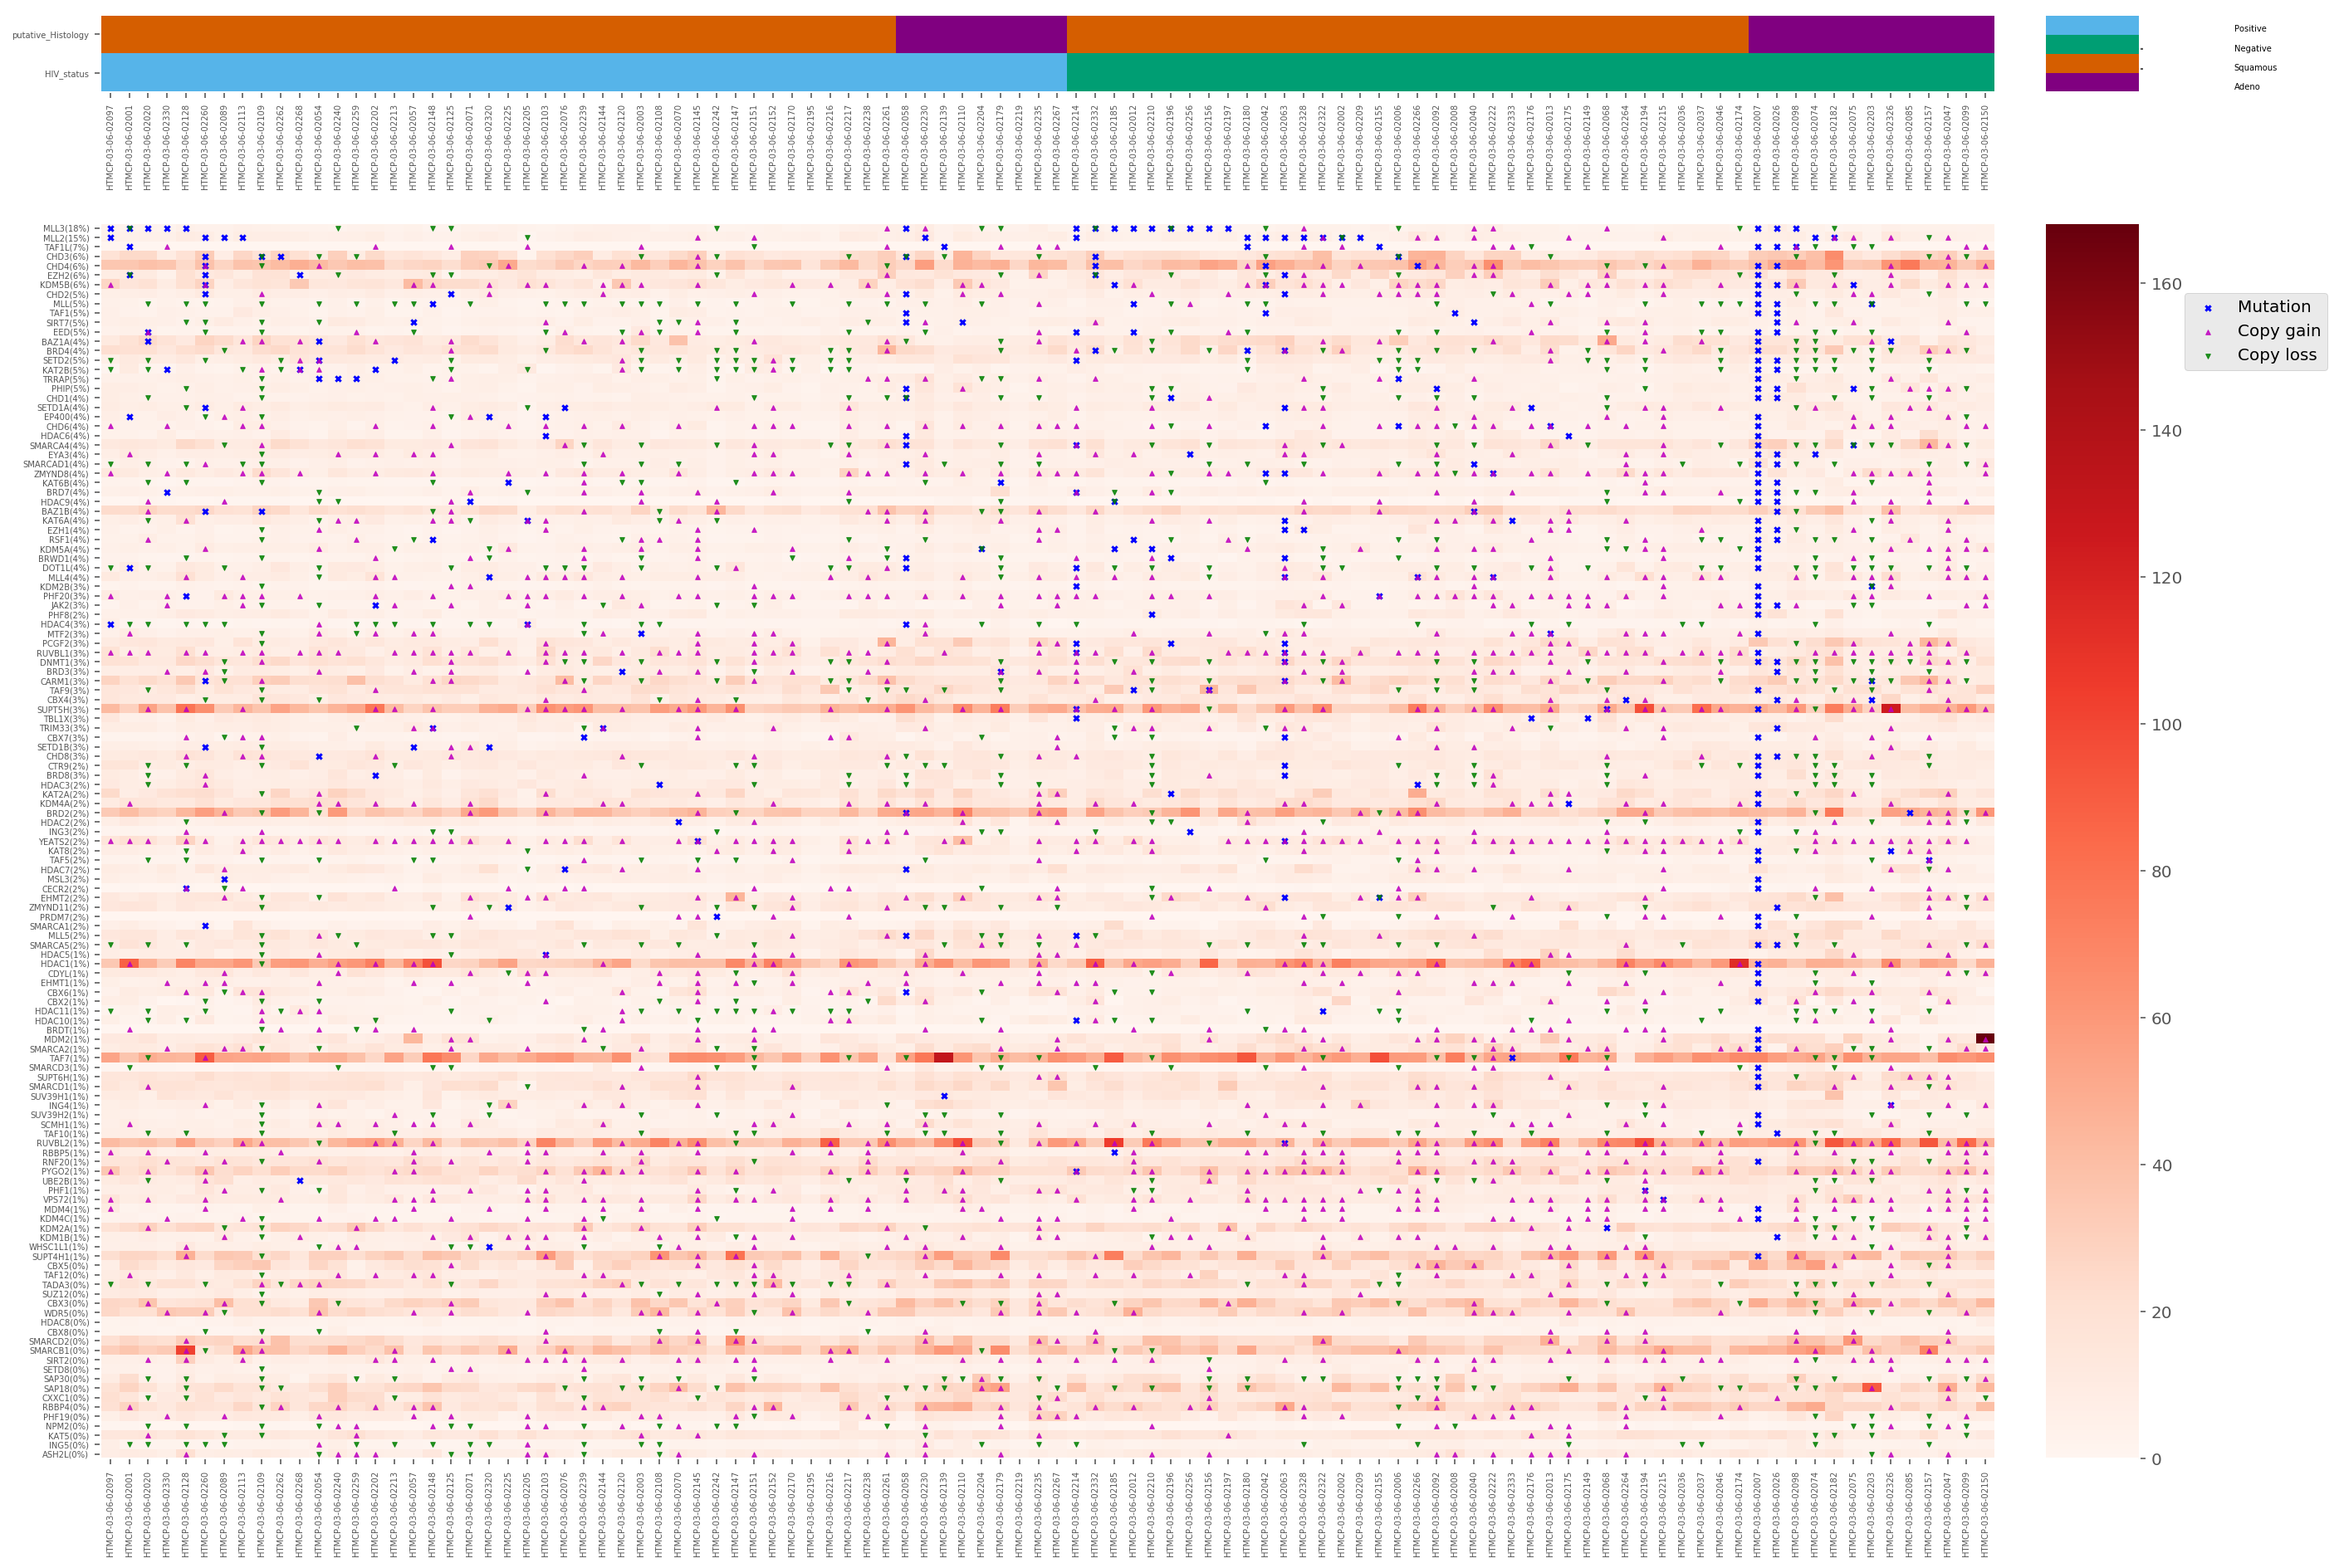

In [396]:
fig = plt.figure(figsize=(22, 16), facecolor='white')
gs = gridspec.GridSpec(2, 2, height_ratios=[1,16], width_ratios=[20,1], 
                       wspace=0.05, # horizontal space
                       hspace=0.0  # vertical space
                      )

ax1 = fig.add_subplot(gs[0])
clrs = ["purple","#D55E00", "#009E73","#56B4E9"]
bounds = np.arange(0, 0.5, 0.1).tolist()

# make a color map of fixed colors
cmap = colors.ListedColormap(clrs)
norm = colors.BoundaryNorm(bounds, cmap.N)
img = ax1.imshow(dfhisto.values, interpolation='none', origin='upper', aspect='auto',
                    cmap=cmap, norm=norm)
ax1.grid(False)
_ = plt.yticks(np.arange(0, len(dfhisto.index), 1), dfhisto.index, fontsize=5)
_ = plt.xticks(np.arange(0, len(dfhisto.columns), 1), dfhisto.columns, fontsize=5, rotation=90)


ax2 = fig.add_subplot(gs[1])
cbar = plt.colorbar(img, cax=ax2, cmap=cmap, norm=norm, boundaries=bounds, orientation='vertical')

cbar.ax.get_yaxis().set_ticks([])
for j, lab in enumerate(lgds):
    _ = cbar.ax.text(2.0, (4 * j + 1) / 16.0, lab, ha='left', va='center', fontsize=5)
cbar.ax.get_yaxis().labelpad = 1
cbar.ax.set_ylabel('abd', rotation=270)


ax3 = fig.add_subplot(gs[2])
im = ax3.imshow(dfexpr.values, interpolation='none',origin='upper', cmap='Reds', aspect='auto')#  cmap='Paired')#
_= plt.yticks(np.arange(0, len(dfexpr.index), 1), dfexpr.index, fontsize=5)
_ = plt.xticks(np.arange(0, len(dfexpr.columns), 1), dfexpr.columns, fontsize=5, rotation=90)
# alpha set marker transparent, linewidths set marker thickness
plt.scatter(x, y, marker='x',s=10, c='b', linewidths=5, label='Mutation',alpha=1)
# plt.scatter(x=[1, 4], y=[1, 1],marker='x',s=20, c='b', linewidths=20, label='SNVs',alpha=1)#, linewidth=10,facecolors='none', edgecolors='b')
plt.scatter(p_gain, q_gain, c='m',marker='^',s=8, label='Copy gain',alpha=.85)
plt.scatter(p_loss, q_loss, c='g',marker='v',s=8, label='Copy loss', alpha=.85)
plt.grid(False)
plt.legend(loc='upper right', bbox_to_anchor=(1.18, 0.95))
# plt.title('Mutations CNVs and Expression of Chromatin Remodeling Genes')


ax4 = fig.add_subplot(gs[3])
plt.colorbar(im, cax=ax4, orientation= 'vertical')#, shrink=0.6, pad=0.02, label='Expression')#'horizontal'
%time plt.savefig('/projects/trans_scratch/validations/workspace/szong/Cervical/epigenetics/oncoprint_mutation_cnv_expression_new_2.png', bbox_inches='tight',dpi=500)